# **RNN Introduction**


## Importing required libraries


In [87]:
import math
import random
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Dropout
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import mean_squared_error

## Loading and preprocessing the data
### Dataset 4-Deep learning/5-Time Series Forecasting (RNN)/LAB/ٌDatasets/traffic.csv

In [48]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [49]:
data = pd.read_csv('/content/drive/MyDrive/T5 Bootcamp/Dataset/week_5/Copy of traffic.csv')

In [50]:
data

,DateTime,Junction,Vehicles,ID
0,2015-11-01 00:00:00,1,15,20151101001
1,2015-11-01 01:00:00,1,13,20151101011
2,2015-11-01 02:00:00,1,10,20151101021
3,2015-11-01 03:00:00,1,7,20151101031
4,2015-11-01 04:00:00,1,9,20151101041
...,...,...,...,...
48115,2017-06-30 19:00:00,4,11,20170630194
48116,2017-06-30 20:00:00,4,30,20170630204
48117,2017-06-30 21:00:00,4,16,20170630214
48118,2017-06-30 22:00:00,4,22,20170630224


## Visualization

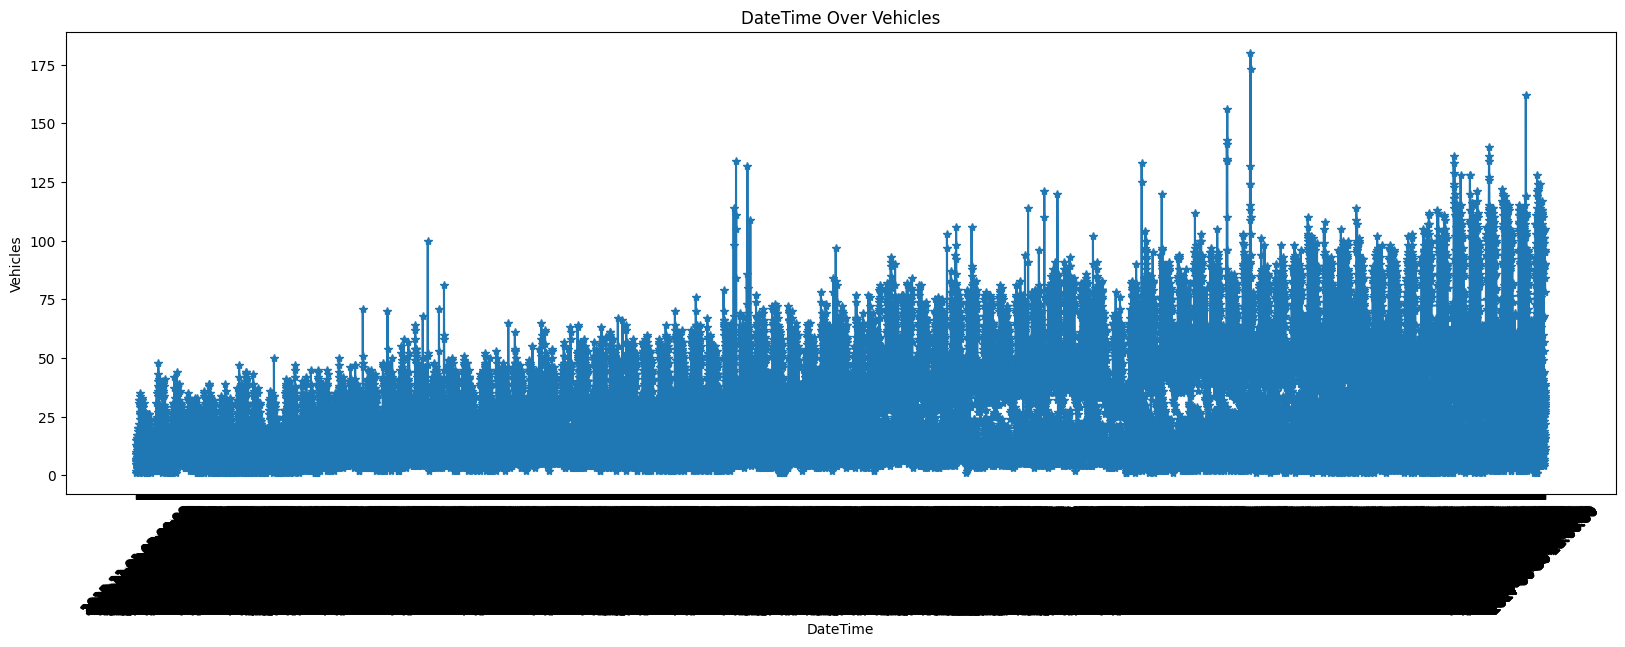

In [51]:
plt.figure(figsize=(20, 6))
plt.plot(data['DateTime'], data['Vehicles'], marker='*')
plt.title('DateTime Over Vehicles')
plt.xlabel('DateTime')
plt.ylabel('Vehicles')
plt.xticks(rotation=45)
plt.grid(False)
plt.show()

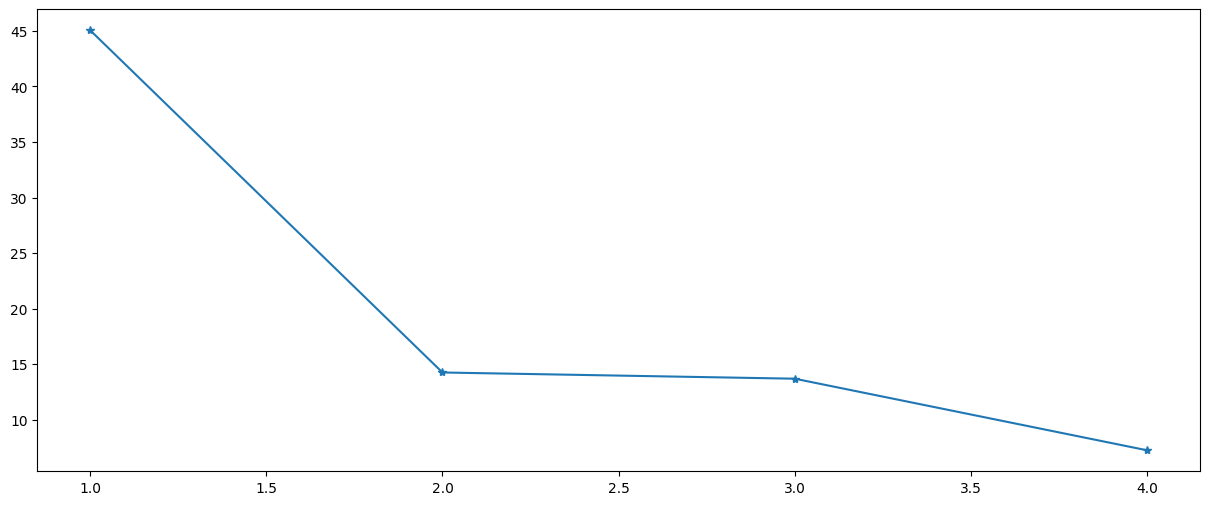

In [52]:
data['Vehicles'] = data['Vehicles']

Junction_average = data.groupby('Junction')['Vehicles'].mean()

plt.figure(figsize=(15, 6))
plt.plot(Junction_average.index, Junction_average.values, marker='*')
plt.grid(False)
plt.show()

## Split the data into train and test

In [72]:
data = data.drop('ID', axis = 1)

In [73]:
scaler = MinMaxScaler()

data[['Vehicles']]=scaler.fit_transform(data[['Vehicles']])

In [74]:
train_size = int(len(data) * 0.8)  # 80% for training
train_data, test_data = data[:train_size], data[train_size:]

In [75]:
# Convert the DataFrame to a NumPy array for RNN input
train_data_np = train_data['Vehicles'].values
test_data_np = test_data['Vehicles'].values

In [76]:
# Define the sequence length (number of past time steps)
n_past = 60

# Prepare sequences for RNN
X_train, y_train = [], []
for i in range(n_past, len(train_data_np)):
    X_train.append(train_data_np[i - n_past:i])
    y_train.append(train_data_np[i])
X_train, y_train = np.array(X_train), np.array(y_train)

# Similarly prepare sequences for the test set
X_test, y_test = [], []
for i in range(n_past, len(test_data_np)):
    X_test.append(test_data_np[i - n_past:i])
    y_test.append(test_data_np[i])
X_test, y_test = np.array(X_test), np.array(y_test)

In [77]:
# Print shapes to verify
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (38436, 60)
y_train shape: (38436,)
X_test shape: (9564, 60)
y_test shape: (9564,)


## Modeling


In [102]:
# Initialize a sequential model
model = Sequential()

# First RNN layer with 50 units, input shape, and return sequences
model.add(SimpleRNN(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))         # Adding dropout to prevent overfitting

# Second RNN layer with 50 units and return sequences
model.add(SimpleRNN(units=50, return_sequences=True))
model.add(Dropout(0.2))

# Third RNN layer with 50 units
model.add(SimpleRNN(units=50))
model.add(Dropout(0.2))

# Add a dense output layer with one unit
model.add(Dense(units=1))
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_6 (SimpleRNN)             │ (None, 60, 50)              │           2,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 60, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_7 (SimpleRNN)             │ (None, 60, 50)              │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_8 (SimpleRNN)             │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 12,751 (49.81 KB)

 Trainable params: 12,751 (49.81 KB)

 Non-trainable params: 0 (0.00 B)

In [80]:
model.compile(loss='mean_squared_error',optimizer='adam')

In [82]:
# Defining our callbacks
checkpoints = ModelCheckpoint(filepath = 'my_weights.keras', save_best_only = True)
# Defining our early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# Training our RNN model
model.fit(X_train, y_train,
          validation_data=(X_test,y_test),
          epochs=10,
          batch_size=32,
          verbose=1,
          callbacks= [checkpoints, early_stopping])

Epoch 1/10
1202/1202 ━━━━━━━━━━━━━━━━━━━━ 68s 56ms/step - loss: 0.0030 - val_loss: 8.4380e-04
Epoch 2/10
1202/1202 ━━━━━━━━━━━━━━━━━━━━ 81s 56ms/step - loss: 0.0015 - val_loss: 8.1608e-04
Epoch 3/10
1202/1202 ━━━━━━━━━━━━━━━━━━━━ 82s 56ms/step - loss: 0.0012 - val_loss: 9.4957e-04
Epoch 4/10
1202/1202 ━━━━━━━━━━━━━━━━━━━━ 83s 56ms/step - loss: 0.0010 - val_loss: 9.4450e-04
Epoch 5/10
1202/1202 ━━━━━━━━━━━━━━━━━━━━ 81s 56ms/step - loss: 9.3857e-04 - val_loss: 9.0974e-04
Epoch 6/10
1202/1202 ━━━━━━━━━━━━━━━━━━━━ 67s 56ms/step - loss: 9.2181e-04 - val_loss: 9.6064e-04
Epoch 7/10
1202/1202 ━━━━━━━━━━━━━━━━━━━━ 82s 56ms/step - loss: 9.3550e-04 - val_loss: 0.0010
Epoch 8/10
1202/1202 ━━━━━━━━━━━━━━━━━━━━ 82s 56ms/step - loss: 8.8298e-04 - val_loss: 8.3201e-04
Epoch 9/10
1202/1202 ━━━━━━━━━━━━━━━━━━━━ 82s 56ms/step - loss: 8.8722e-04 - val_loss: 8.6258e-04
Epoch 10/10
1202/1202 ━━━━━━━━━━━━━━━━━━━━ 68s 56ms/step - loss: 8.6652e-04 - val_loss: 8.6722e-04


In [83]:
# Let's do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

1202/1202 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step
299/299 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step


In [85]:
# Transform back to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [88]:
# Calculate train data RMSE
print(math.sqrt(mean_squared_error(y_train,train_predict)))
# Calculate test data RMSE
print(math.sqrt(mean_squared_error(y_test,test_predict)))

0.02461644776481766
0.028567047322892256


## Visualization of results


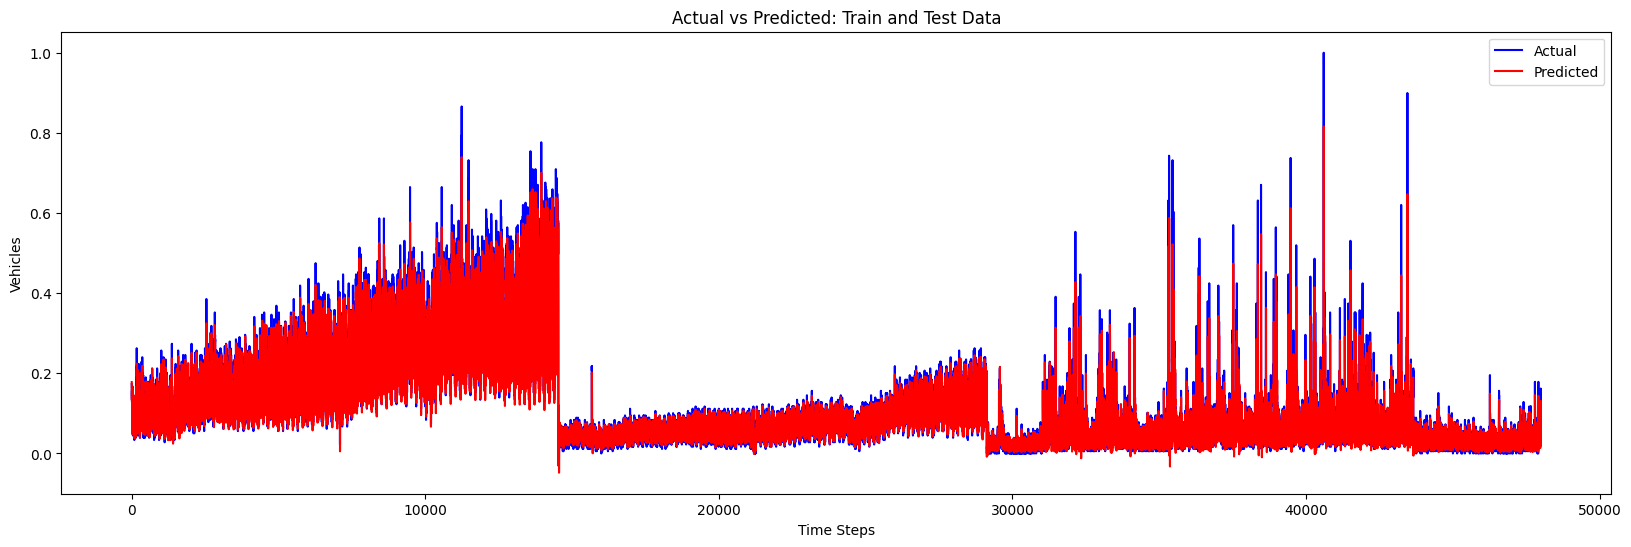

In [101]:
# Concatenate train and test data for both actual and predicted values
total_actual = np.concatenate((scaler.inverse_transform(y_train.reshape(-1, 1)), scaler.inverse_transform(y_test.reshape(-1, 1))))
total_predicted = np.concatenate((train_predict, test_predict))

# Plotting the combined results
plt.figure(figsize=(20, 6))
plt.plot(total_actual, label="Actual", color='blue')
plt.plot(total_predicted, label="Predicted", color='red')
plt.title("Actual vs Predicted: Train and Test Data")
plt.xlabel('Time Steps')
plt.ylabel('Vehicles')
plt.legend()
plt.show()
